In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# No env success rate

In [3]:
dfb = pd.read_csv("run_log_no.csv", sep="\t", names=["doi", "file", "result"])

In [4]:
len(dfb['doi'])

7199

In [6]:
# take out bad downloads
dfb_e = pd.read_csv("run_log_ds_no.csv", sep="\t", names=["doi", "status"])
dfb_e = dfb_e[dfb_e.status != 'ok']
len(dfb_e)

777

In [7]:
bad = dfb_e['doi'].unique().tolist()
len(bad)

106

In [8]:
# take out bad from the list
dfb = dfb[~dfb.doi.isin(bad)]

In [9]:
len(dfb)

6754

In [10]:
# calculate success rate
success = (dfb['result'] == 'success').sum()
print str(success)+ " out of " + str(len(dfb)) +" => "+ str(success*1.0/len(dfb))

700 out of 6754 => 0.1036422860527095


In [11]:
til = (dfb['result'] == 'time limit exceeded').sum()
print str(til)+ " out of " + str(len(dfb)) +" => "+ str(til*1.0/len(dfb))

72 out of 6754 => 0.010660349422564407


In [12]:
error = len(dfb)-til-success

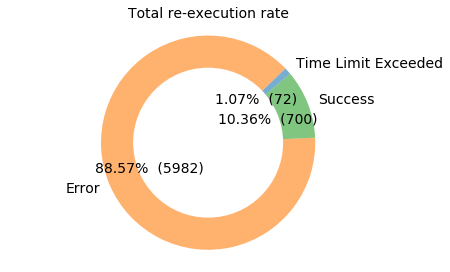

In [13]:
# Pie chart
labels = ["Time Limit Exceeded",'Error', 'Success']
sizes = [til, error, success]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 14
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=40,  textprops={'fontsize': 14},wedgeprops={'alpha':0.6})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total re-execution rate", size=14)
plt.tight_layout()

plt.show()
fig1.savefig("plots/no_env_before.png")

## Aggregate per replication package

- If a replication package contains successful code => it is success
- If a replication package containes TLE code => it is TLE
- Rest is failed

In [14]:
ag_tot = set(dfb['doi'].unique().tolist())
len(ag_tot)

1889

In [15]:
ag_suc = set(dfb[dfb.result == 'success']['doi'].unique().tolist())
len(ag_suc)

359

In [16]:
ag_exc = set(dfb[dfb['result'] == 'time limit exceeded']['doi'].unique().tolist())
len(ag_exc)

72

In [17]:
# remove dupicates in ag_exc
ag_exc = ag_exc - ag_suc
len(ag_exc)

59

In [18]:
# calculate failed
ag_failed = ag_tot - ag_suc - ag_exc
len(ag_failed)

1471

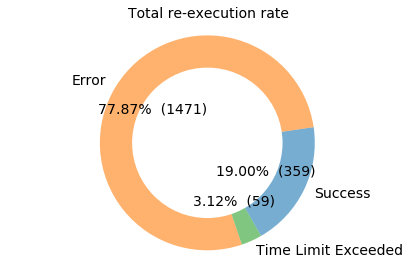

In [21]:
labels = [ 'Success', 'Error', 'Time Limit Exceeded']
sizes = [ len(ag_suc), len(ag_failed), len(ag_exc)]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 14
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=-60,  textprops={'fontsize': 14},wedgeprops={'alpha':0.6})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total re-execution rate", size=14)
plt.tight_layout()

plt.show()
fig1.savefig("plots/before_per_package.png")

# Success rate after

In [22]:
sto_e = pd.read_csv("run_log_ds_sto1.csv", sep="\t", names=["doi", "status"])

In [23]:
sto_e = sto_e[sto_e.status != 'ok']
sto_e.head()

,doi,status
14,doi:10.7910/DVN/YM7IWP,checksum error
15,doi:10.7910/DVN/YM7IWP,checksum error
16,doi:10.7910/DVN/YM7IWP,checksum error
17,doi:10.7910/DVN/YM7IWP,checksum error
18,doi:10.7910/DVN/YM7IWP,checksum error


In [24]:
bad=sto_e['doi'].unique().tolist()
len(bad)

119

In [25]:
sto = pd.read_csv("run_log_sto1.csv", sep="\t", names=["doi", "file", "result"])

In [26]:
len(sto)

5061

In [27]:
success = (sto['result'] == 'success').sum()
print str(success)+ " out of " + str(len(sto)) +" => "+ str(success*1.0/len(sto))

822 out of 5061 => 0.16241849436870184


In [28]:
til = (sto['result'] == 'time limit exceeded').sum()
print str(til)+ " out of " + str(len(sto)) +" => "+ str(til*1.0/len(sto))

753 out of 5061 => 0.14878482513337285


In [29]:
error = len(sto)-til-success

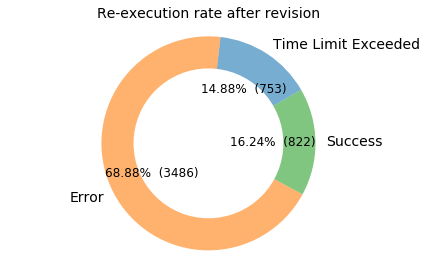

In [31]:
# Pie chart
labels = ["Time Limit Exceeded",'Error', 'Success']
sizes = [til, error, success]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 14
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=30,  textprops={'fontsize': 12}, wedgeprops={'alpha':0.6})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Re-execution rate after revision", size=14)
plt.tight_layout()

plt.show()
fig1.savefig("plots/sto_after.png")

## Aggregated

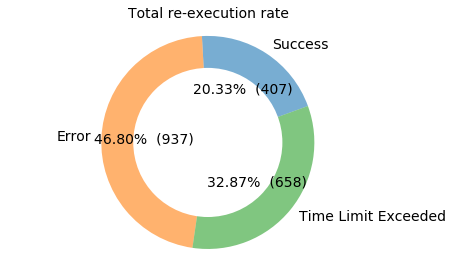

In [32]:
ag_tot = set(sto['doi'].unique().tolist())
ag_exc = set(sto[sto.result == 'time limit exceeded']['doi'].unique().tolist())
ag_suc = set(sto[sto.result == 'success']['doi'].unique().tolist())

ag_exc = ag_exc - ag_suc
ag_failed = ag_tot - ag_suc - ag_exc

labels = [ 'Success', 'Error', 'Time Limit Exceeded']
sizes = [ len(ag_suc), len(ag_failed), len(ag_exc)]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 14
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=20,  textprops={'fontsize': 14},wedgeprops={'alpha':0.6})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total re-execution rate", size=14)
plt.tight_layout()

plt.show()
fig1.savefig("plots/agg_after.png")